In [1]:
import imblearn
import numpy as np
import pandas as pd

# Data import

In [7]:
df = pd.read_csv('...', header=None) # use your path

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'Label'
]

In [10]:
df.shape

(4898431, 42)

### Preliminary data analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [12]:
# Dataset labels
print(df['Label'].unique())
len(df['Label'].unique())

['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


23

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [14]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Remove redundat features

In [15]:
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)

### Transform to catergorical features

In [16]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [17]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,1,24,9,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,24,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,24,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,24,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,24,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [18]:
df.shape

(4898431, 40)

In [20]:
df['Label'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Label, dtype: int64

### Distribution of attacks

In [22]:
import matplotlib
import matplotlib.pyplot as plt

In [28]:
labels = df['Label']

In [27]:
df.shape

(4898431, 40)

In [68]:
df.groupby('Label').agg({'Label':'first', 'Label':'count'}).rename_axis(None).sort_values('Label', ascending=False)

,Label
smurf.,2807886
neptune.,1072017
normal.,972781
satan.,15892
ipsweep.,12481
portsweep.,10413
nmap.,2316
back.,2203
warezclient.,1020
teardrop.,979


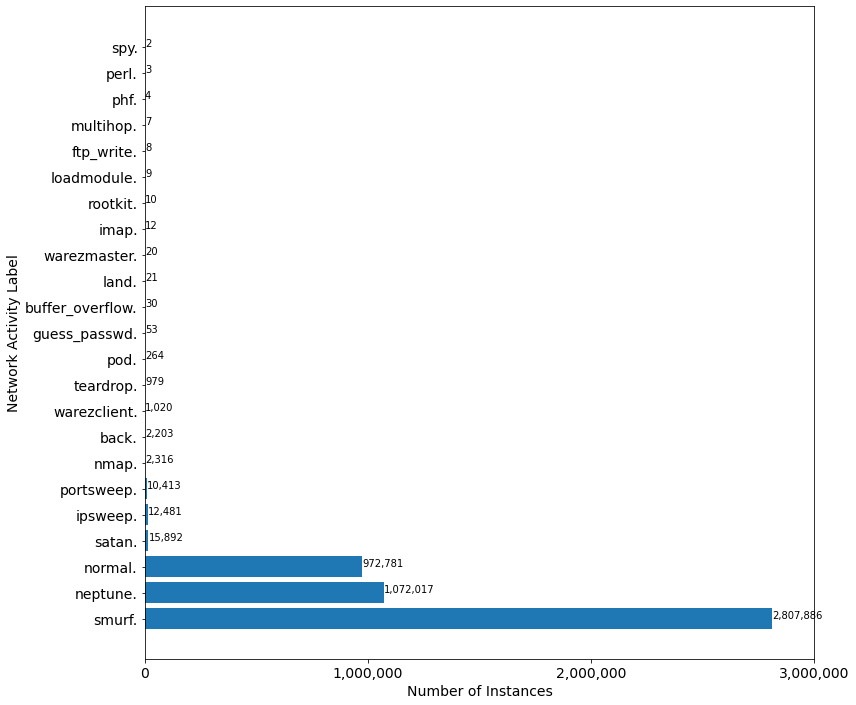

In [44]:
# get name of each network activity type
x_coords = labels.value_counts().index
# get frequency of each network activity type
y_coords = labels.value_counts().values

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
_ = ax.barh(x_coords, y_coords)

# add text to end of each bar
for index, value in enumerate(y_coords):
    _ = ax.text(value + 1000, index, format(value, ","), color='black')
_ = plt.xlabel("Number of Instances", fontsize=14)
_ = plt.ylabel("Network Activity Label", fontsize=14)
# adjust x-tick limits
_ = plt.xticks(list(range(0,4_000_000, 1_000_000)))
# format x-tick labels with commas for readability
_ = ax.set_xticklabels(["{:,}".format(x) for x in ax.get_xticks()])
#plt.show()

### Univariate histogramms

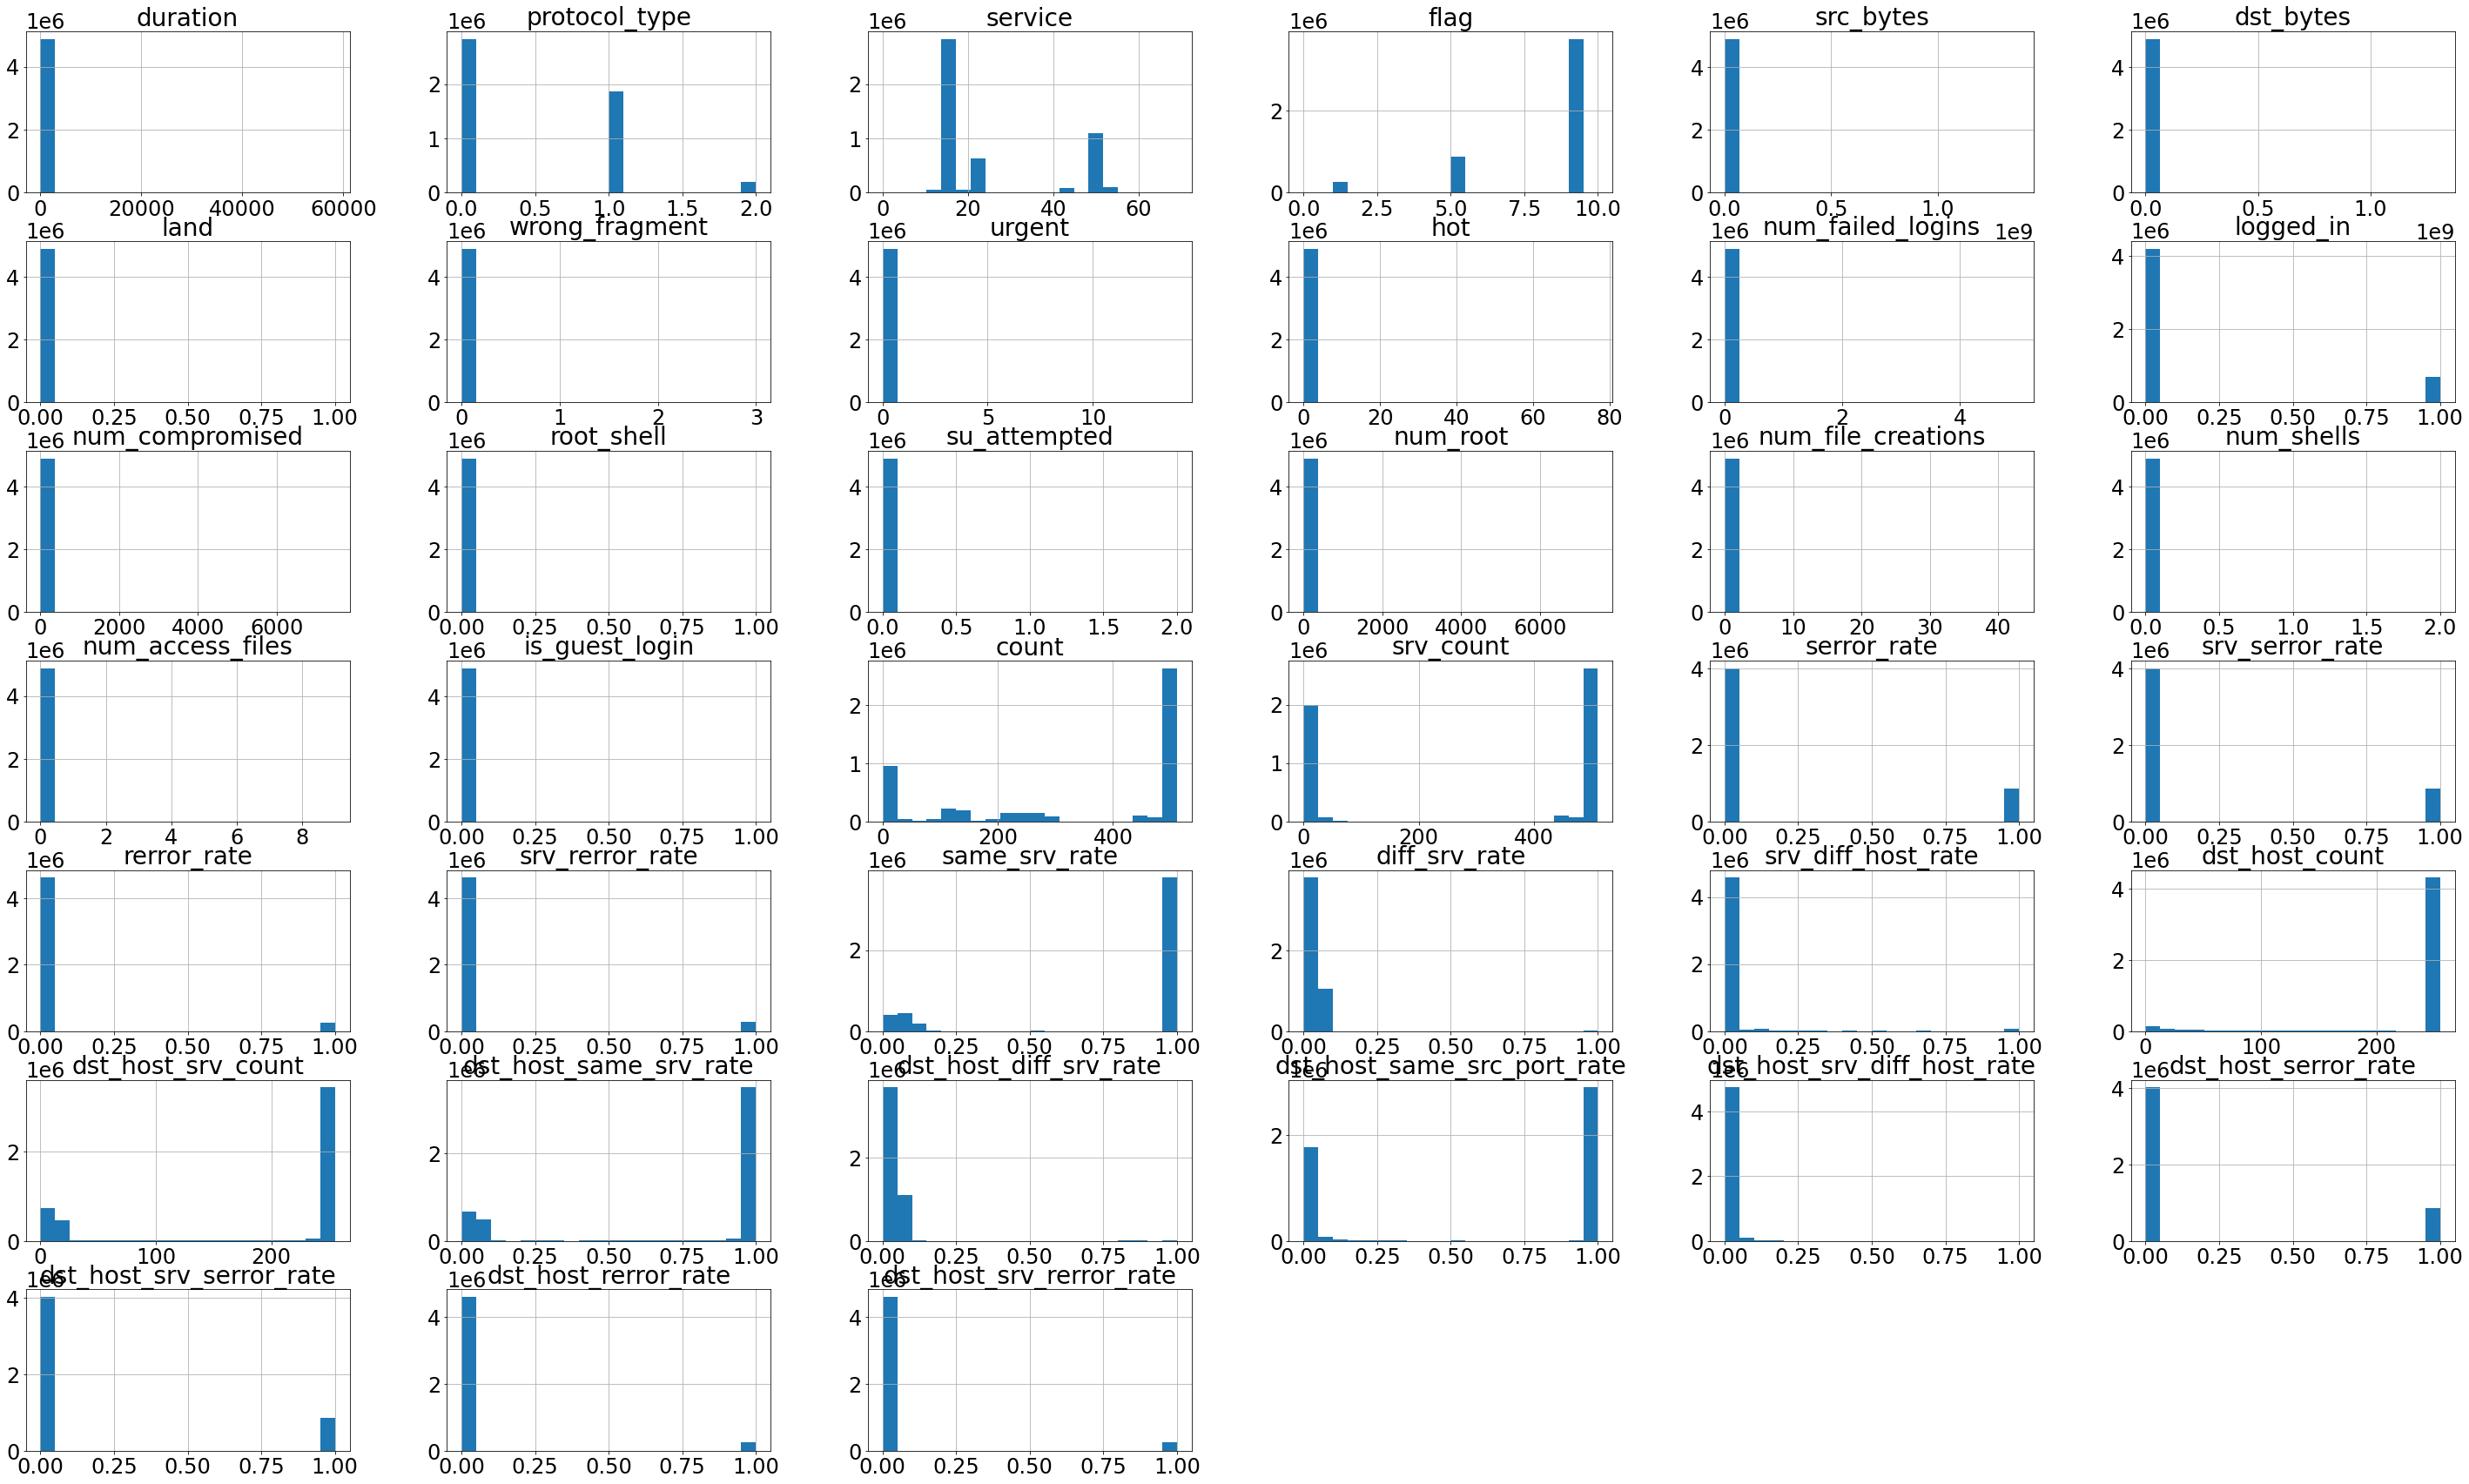

In [45]:
params = {'axes.titlesize':'28',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
df.hist(figsize=(50, 30), bins=20)
plt.show()

### Feature correlations

In [50]:
import seaborn as sns

In [47]:
corr = df.drop(columns=['Label']).corr()

<AxesSubplot:>

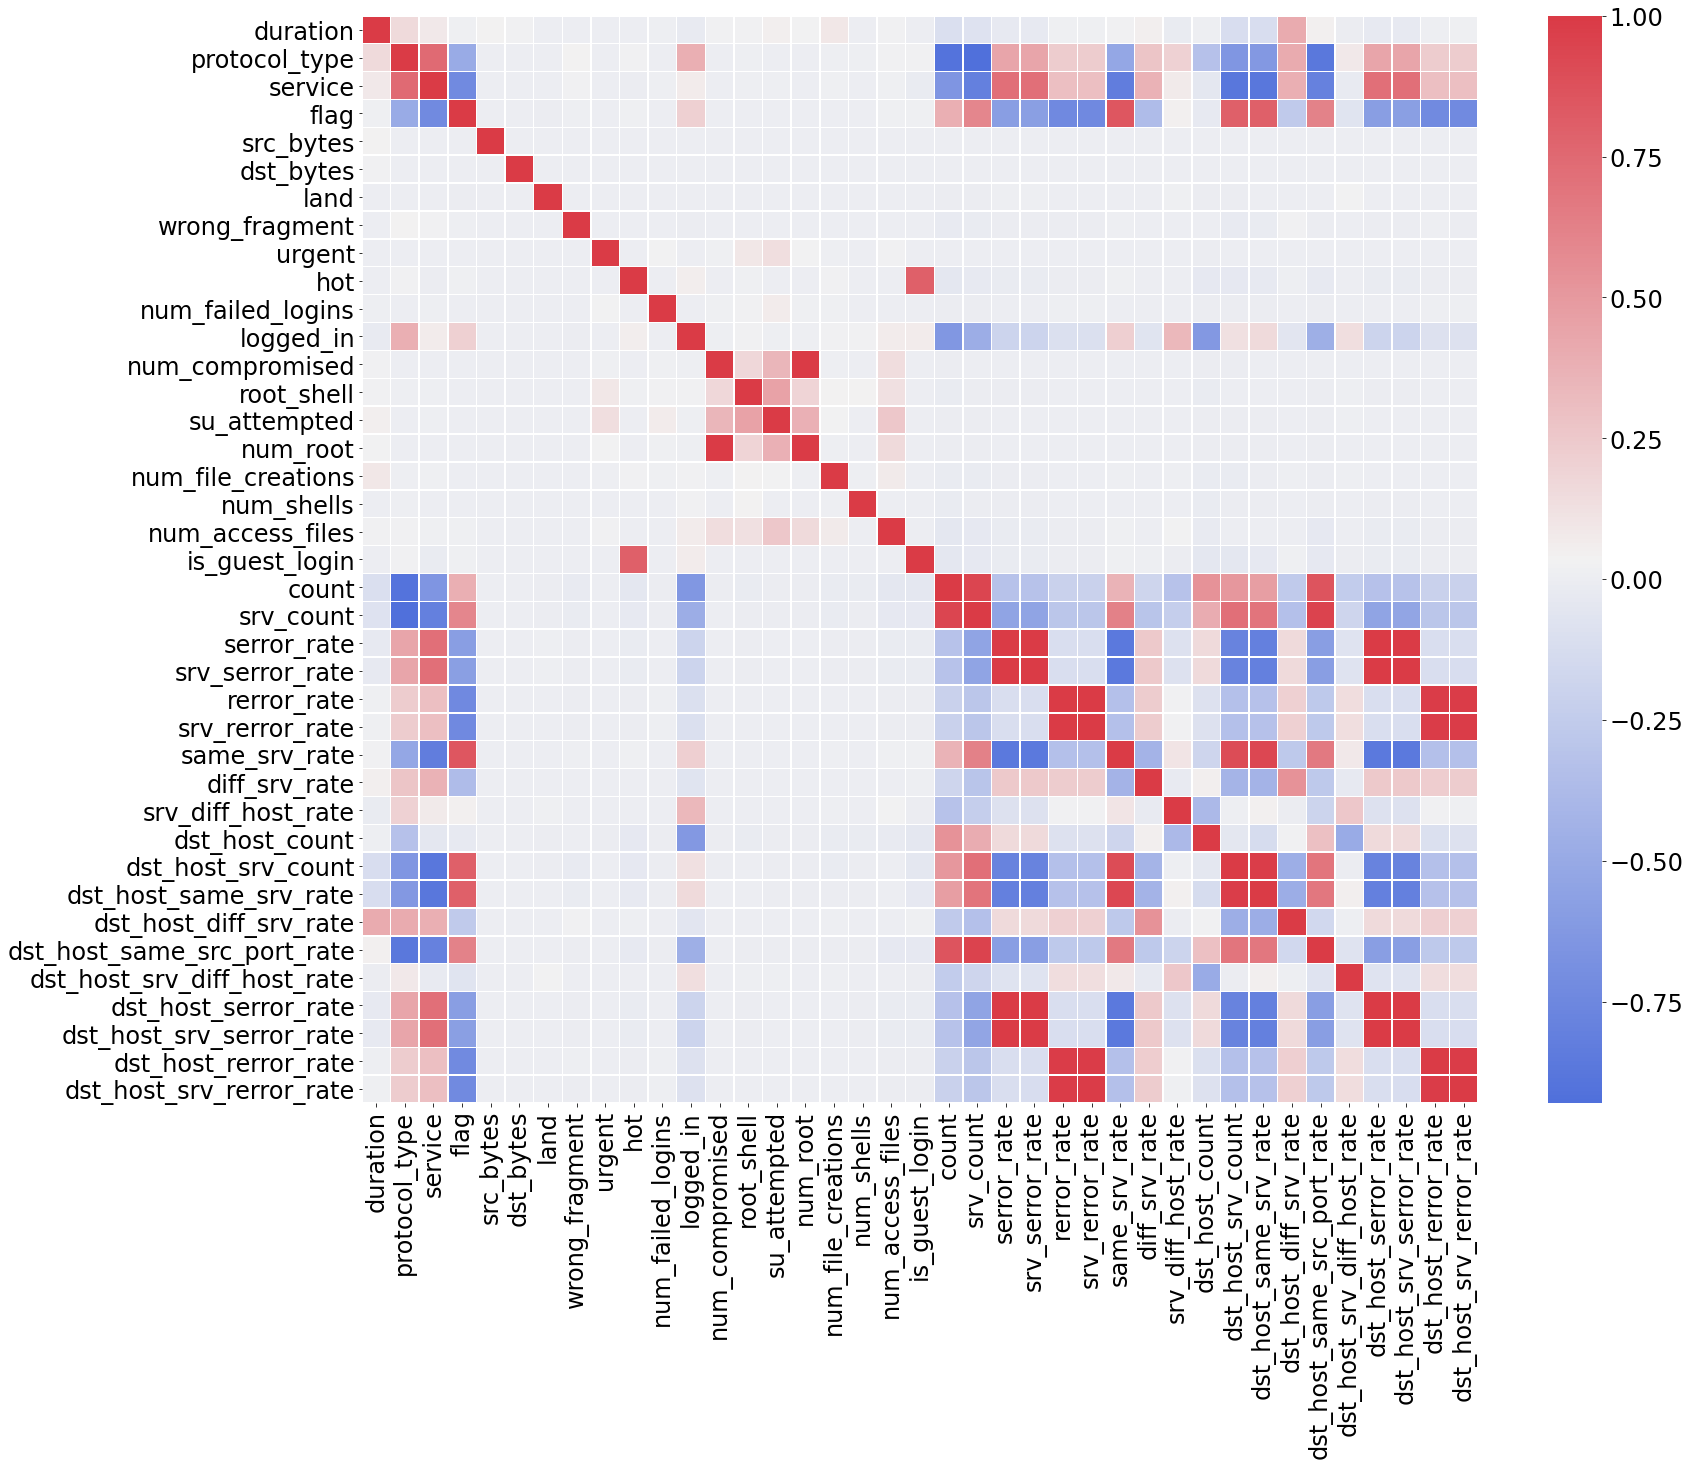

In [51]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))

In [52]:
def get_abs_correlations(df, t):
    labels_to_drop = set()
    cols = df.columns.drop(['Label'])
    for i in range(0, df.shape[1]-2):
        for j in range(0, i+1):
            labels_to_drop.add((cols[i], cols[j]))
    
    c = corr.abs().unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(df, 0.8))

dst_host_srv_rerror_rate  dst_host_srv_rerror_rate       1.000000
srv_serror_rate           dst_host_srv_serror_rate       0.999392
serror_rate               dst_host_serror_rate           0.999006
                          srv_serror_rate                0.998692
dst_host_serror_rate      dst_host_srv_serror_rate       0.998286
serror_rate               dst_host_srv_serror_rate       0.998251
srv_serror_rate           dst_host_serror_rate           0.997942
num_compromised           num_root                       0.997580
rerror_rate               srv_rerror_rate                0.995372
                          dst_host_rerror_rate           0.989756
srv_rerror_rate           dst_host_srv_rerror_rate       0.987909
dst_host_srv_rerror_rate  srv_rerror_rate                0.987909
dst_host_rerror_rate      dst_host_srv_rerror_rate       0.986979
dst_host_srv_rerror_rate  dst_host_rerror_rate           0.986979
                          rerror_rate                    0.985978
rerror_rat

### Data visualisation

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [71]:
# pick 10.000 random rows from the dataset to visualize 
# random seed for reproduction the results
np.random.seed(42)

rand_perm = np.random.permutation(df.shape[0])

In [72]:
feature_cols = df.columns[:-1]

dataset_subset = df.loc[rand_perm[:10000],:]

In [73]:
dataset_subset = dataset_subset.replace([np.inf, -np.inf], np.nan)
dataset_subset.dropna(inplace=True)

In [79]:
data_subset = dataset_subset[feature_cols].values

In [80]:
#principal component analysis
pca = PCA(n_components=6)
pca_res = pca.fit_transform(data_subset)


np.sum(pca.explained_variance_ratio_)

0.9999987382240791

In [81]:
# Computing t-SNE.

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_res = tsne.fit_transform(data_subset)
print("done")

done


In [82]:
dataset_subset['tsne_firstD'] = tsne_res[:,0]
dataset_subset['tsne_secondD'] = tsne_res[:,1]

<AxesSubplot:xlabel='tsne_firstD', ylabel='tsne_secondD'>

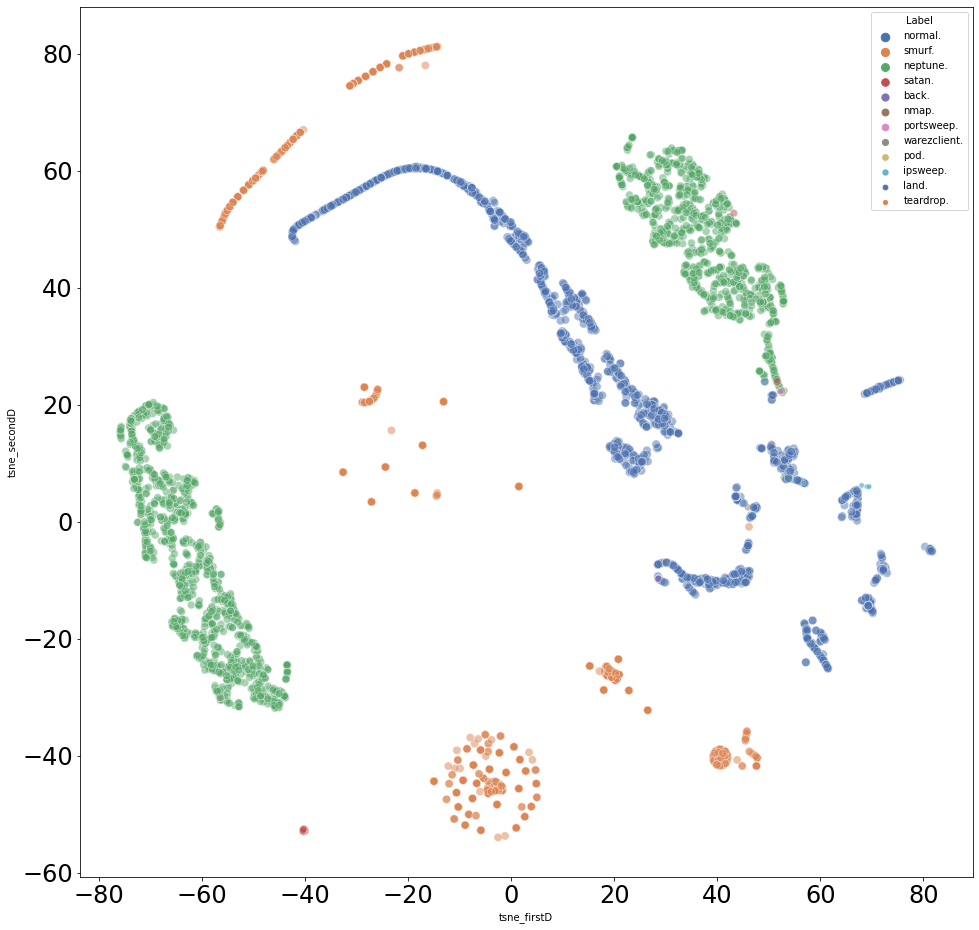

In [101]:
plt.figure(figsize=(16,16))

sns.scatterplot(
    x="tsne_firstD", y="tsne_secondD",
    palette="deep",
    data=dataset_subset,
    hue="Label",
    size="Label",
    legend="full",
    alpha=0.5
)

In [109]:
# Saving cleaned dataset.

#df.to_csv(r'C:\Users\ANDC\Desktop\Python\Final\Data processing\KddCup_Dataset_clean.csv', index=False)

In [110]:
#datasetest = pd.read_csv('KddCup_Dataset_clean.csv')

In [112]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,1,24,9,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,24,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,24,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,24,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,24,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


### Data balancing 

In [113]:
attacks = df[df['Label'] != "normal."]

In [114]:
attacks.shape

(3925650, 40)

In [116]:
benign = df[df['Label'] == "normal."]

In [117]:
benign.shape

(972781, 40)

In [119]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(attacks, 
                                   replace=True,      # sample without replacement
                                   n_samples=972781,  # to match minority class
                                   random_state=123)  # reproducible results
 

In [120]:
df_majority_downsampled.shape

(972781, 40)

In [121]:
df_majority_downsampled['Label'].value_counts()

smurf.              695645
neptune.            265732
satan.                3965
ipsweep.              3130
portsweep.            2627
back.                  561
nmap.                  545
warezclient.           242
teardrop.              223
pod.                    70
guess_passwd.           13
warezmaster.             8
buffer_overflow.         6
land.                    4
phf.                     3
multihop.                3
rootkit.                 2
loadmodule.              1
ftp_write.               1
Name: Label, dtype: int64

In [122]:
# Combine majority class with downsampled majority class
df_downsampled = pd.concat([benign, df_majority_downsampled])

In [123]:
# Saving cleaned dataset.

#df_downsampled.to_csv(r'C:\Users\ANDC\Desktop\Python\Final\Data processing\KddCup_Dataset_downsampled.csv', index=False)

In [125]:
df_downsampled.shape

(1945562, 40)

In [127]:
df_majority_downsampled.shape ,benign.shape

((972781, 40), (972781, 40))

### Scaling the data

In [129]:
# Splitting dataset into features and labels.

labels = df_downsampled['Label']
features = df_downsampled.loc[:, df_downsampled.columns != 'Label'].astype('float64')

In [130]:
features.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,24.0,9.0,215.0,45076.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,24.0,9.0,162.0,4528.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,24.0,9.0,236.0,1228.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,24.0,9.0,233.0,2032.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,24.0,9.0,239.0,486.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [131]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [132]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [133]:
# Checking if scaling has been done.
features[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.68443961e-02,  1.06311321e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.00393701e-01, -2.95275591e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.57575758e+00, -2.21739130e+00, -6.25000000e+00,
        0.00000000e+00, -6.00000000e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

### Label encoding

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [141]:
# Labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [142]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()

array(['normal.', 'smurf.', 'neptune.', 'satan.', 'ipsweep.',
       'portsweep.', 'back.', 'nmap.', 'warezclient.', 'pod.',
       'teardrop.', 'guess_passwd.', 'land.', 'buffer_overflow.',
       'warezmaster.', 'multihop.', 'rootkit.', 'loadmodule.', 'phf.',
       'ftp_write.'], dtype=object)